# 二十七.OpenGL入门及绘制基本图形（一）

一.OpenGL入门知识

	1.什么是OpenGL
	2.OpenGL安装
二.OpenGL入门程序

	1.OpenGL绘制正方形
	2.OpenGL绘制水壶
	3.OpenGL绘制多个图形4.OpenGL绘图代码及原理详解
三.OpenGL基础知识

	1.OpenGL语法
	2.老式OpenGL vs 现代OpenGL
	3.OpenGL绘制时钟


## 27.1.OpenGL入门知识

1.什么是OpenGLOpenGL

(Open Graphics Library，译为“开放式图形库”) 是用于渲染2D、3D矢量图形的跨语言、跨平台的应用程序编程接口（API）。这个接口由近350个不同的函数调用组成，用来绘制从简单的图形元件到复杂的三维景象。OpenGL常用于CAD、虚拟现实、科学可视化程序和电子游戏开发。OpenGL可用于设置所需的对象、图像和操作，以便开发交互式的3维计算机图形应用程序。OpenGL被设计为一个现代化的、硬件无关的接口，因此我们可以在不考虑计算机操作系统或窗口系统的前提下，在多种不同的图形硬件系统上，或者完全通过软件的方式实现OpenGL的接口。OpenGL的高效实现（利用了图形加速硬件）存在于Windows，部分UNIX平台和Mac OS。这些实现一般由显示设备厂商提供，而且非常依赖于该厂商提供的硬件。


OpenGL规范由1992年成立的OpenGL架构评审委员会（ARB）维护。ARB由一些对创建一个统一的、普遍可用的API特别感兴趣的公司组成。到了今天已经发布了非常多的OpenGL版本，以及大量构建于OpenGL之上以简化应用程序开发过程的软件库。这些软件库大量用于视频游戏、科学可视化和医学软件的开发，或者只是用来显示图像。一个用来渲染图像的OpenGL程序需要执行的主要操作如下：从OpenGL的几何图元中设置数据，用于构建形状使用不同的着色器（shader）对输入的图元数据执行计算操作，判断它们的位置、颜色，以及其他渲染属性将输入图元的数学描述转换为与屏幕位置对应的像素片元（fragment），这一步也称作光栅化（rasterization）最后，针对光栅化过程产生的每个片元，执行片元着色器（fragment shader），从而决定这个片元的最终颜色和位置如果有必要，还需要对每个片元执行一些额外的操作，例如判断片元对应的对象是否可见，或者将片元的颜色与当前屏幕位置的颜色进行融合


2.OpenGL安装

作者的电脑环境为Win10+Python3.7，打开CMD调用pip工具进行安装，如下图所示。



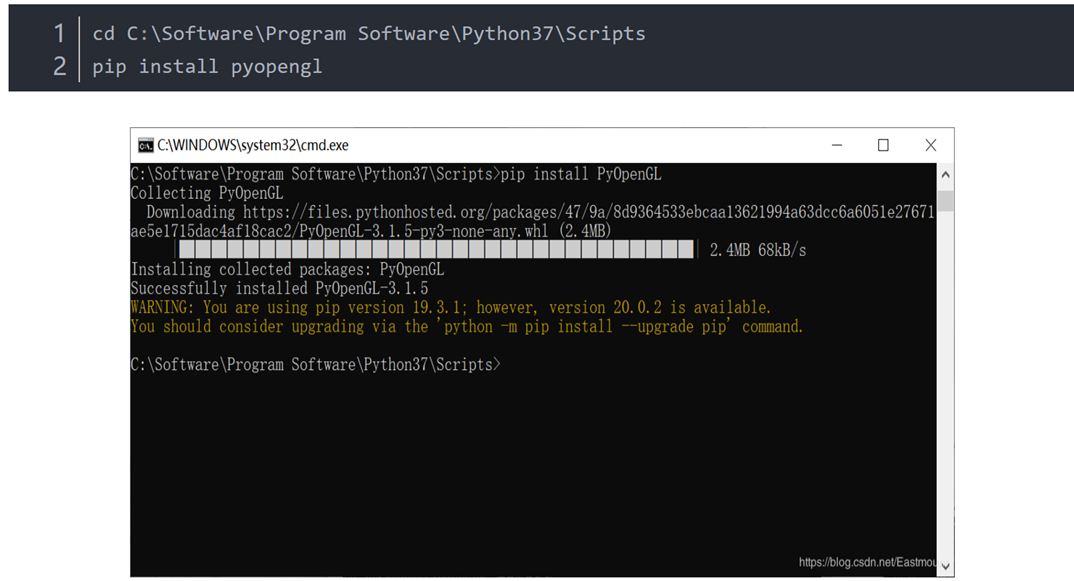

但通常安装成功之后，运行代码会报错“OpenGL.error.NullFunctionError: Attempt to call an undefined function glutInit, check for bool(glutInit) before calling”。


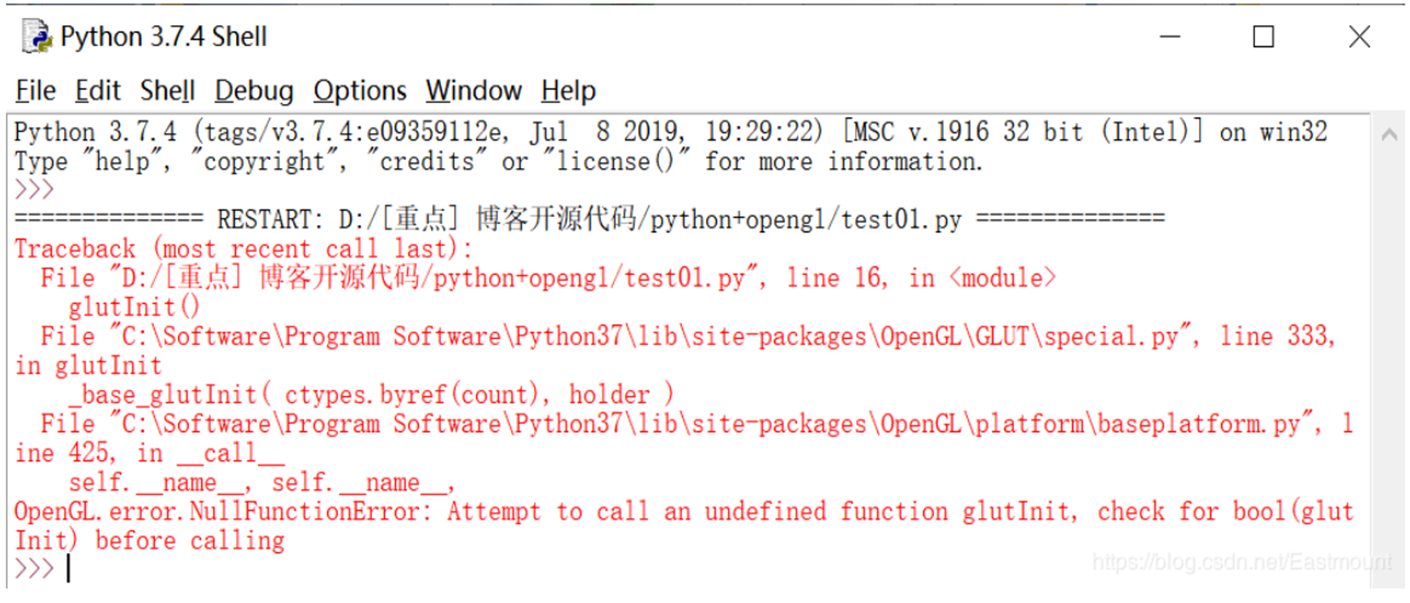

据说是pip默认安装的是32位版本的
pyopengl，而作者的操作系统是64位。
网上很多大牛会去 “https://www.lfd.
uci.edu/~gohlke/pythonlibs/#pyopengl”
 网站下载适合自己的版本。比如
Python3.7且64位操作系统。


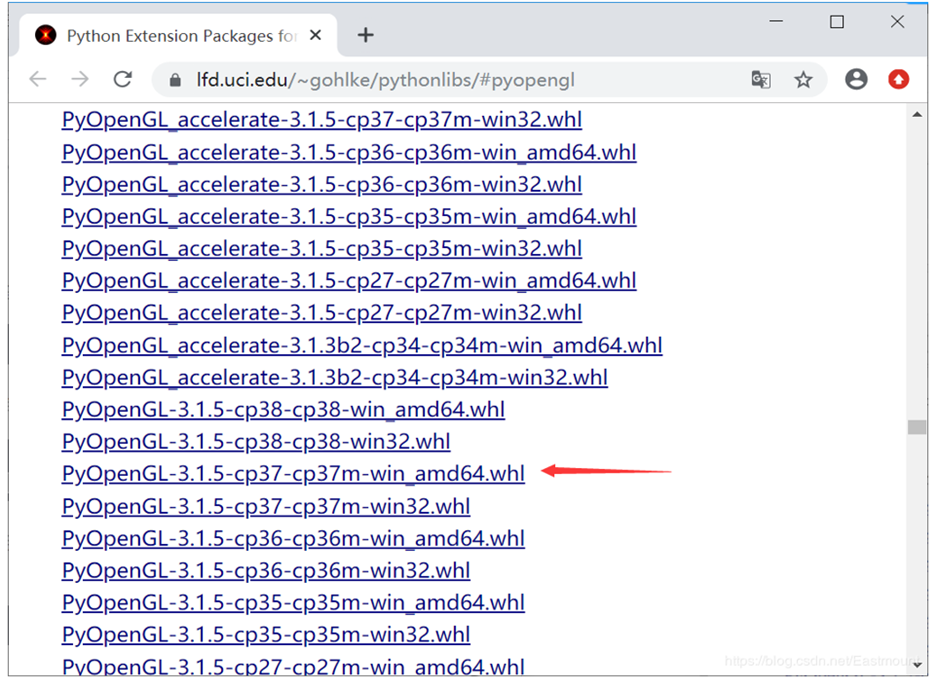

In [ ]:
安装流程如下所示：

到这里，我们Python的OpenGL库就安装成功了！


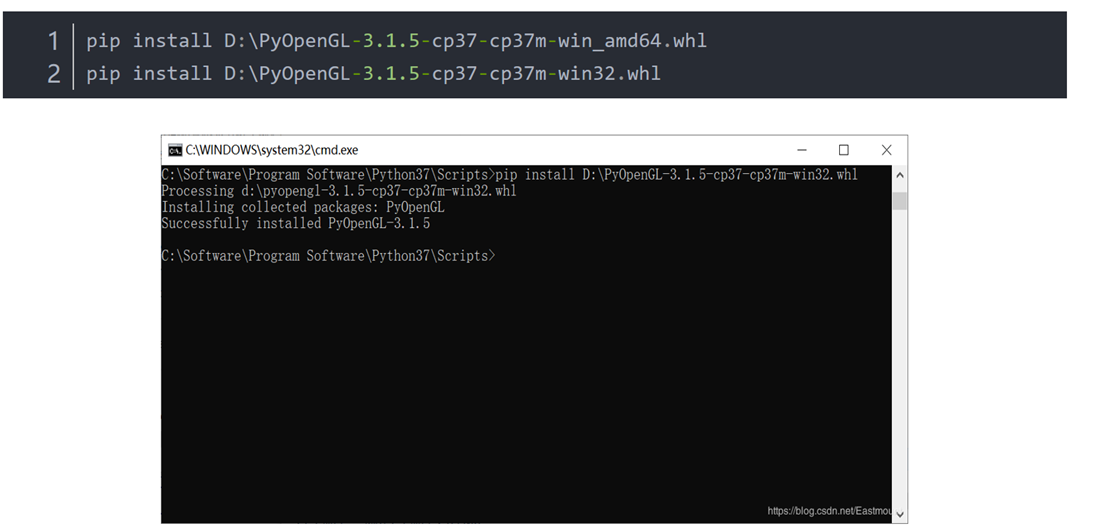

二.OpenGL入门程序
我们首先介绍两个入门代码，然后再进行深入的讲解。
1.OpenGL绘制正方形
完整代码如下：


In [ ]:
# -*- coding: utf-8 -*-
from OpenGL.GL import *
from OpenGL.GLU import *
from OpenGL.GLUT import *

# 绘制图像函数
def display():
    # 清除屏幕及深度缓存
    glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
    # 设置红色
    glColor3f(1.0, 0.0, 0.0)
    # 开始绘制四边形
    glBegin(GL_QUADS)
    # 绘制四个顶点
    glVertex3f(-0.5, -0.5, 0.0)
    glVertex3f(0.5, -0.5, 0.0)
    glVertex3f(0.5, 0.5, 0.0)
    glVertex3f(-0.5, 0.5, 0.0)
    # 结束绘制四边形
    glEnd()
    # 清空缓冲区并将指令送往硬件执行
    glFlush()

# 主函数
if __name__ == "__main__":
    # 使用glut库初始化OpenGL
    glutInit()
    # 显示模式 GLUT_SINGLE无缓冲直接显示|GLUT_RGBA采用RGB(A非alpha)
    glutInitDisplayMode(GLUT_SINGLE | GLUT_RGBA)
    # 设置窗口位置大小
    glutInitWindowSize(400, 400)
    # 创建窗口
    glutCreateWindow("eastmount")
    # 调用display()函数绘制图像
    glutDisplayFunc(display)
    # 进入glut主循环
    glutMainLoop()



运行结果如下图所示：   

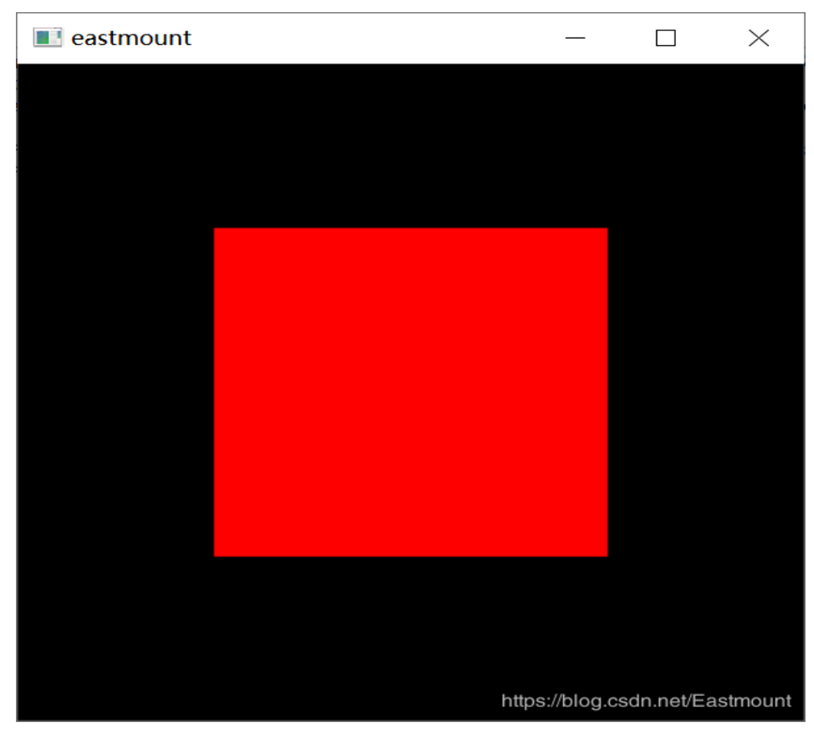

## 27.2.OpenGL入门程序

核心步骤如下：

主函数使用glut库初始化

	OpenGLglutInit()
    
设置显示模式并初始化glut窗口（画布）

	glutInitDisplayMode(GLUT_SINGLE | GLUT_RGBA)
	glutInitWindowSize(400, 400)
	glutCreateWindow(“eastmount”)
    
注册绘制图像的回调函数，如display()	

	glutDisplayFunc(display)
    
绘制图像display函数，包括清除画布、设置颜色、绘制图元、设置定点、结束绘制、刷新执行


	glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
	glColor3f(1.0, 0.0, 0.0)
	glBegin(GL_QUADS)
	glVertex3f(-0.5, -0.5, 0.0)
	glVertex3f(0.5, -0.5, 0.0)
	glVertex3f(0.5, 0.5, 0.0)
	glVertex3f(-0.5, 0.5, 0.0)
	glEnd()glFlush()

进入glut主循环
	glutMainLoop()


2.OpenGL绘制水壶
接着补充一段经典的水壶代码，所有计算机试卷、计算机图形学、3D图像领域都会绘制它。


In [ ]:
# -*- coding: utf-8 -*-
from OpenGL.GL import *
from OpenGL.GLU import *
from OpenGL.GLUT import *

# 绘制图像函数
def drawFunc():
    # 清除屏幕及深度缓存
    glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
    # 设置绕轴旋转(角度,x,y,z)
    glRotatef(0.1, 5, 5, 0)
    
    # 绘制实心茶壶
    # glutSolidTeapot(0.5)
    # 绘制线框茶壶
    glutWireTeapot(0.5)
    
    # 刷新显示图像
    glFlush()

# 主函数
if __name__ == "__main__":
    # 使用glut库初始化OpenGL
    glutInit()
    # 显示模式 GLUT_SINGLE无缓冲直接显示|GLUT_RGBA采用RGB(A非alpha)
    glutInitDisplayMode(GLUT_SINGLE | GLUT_RGBA)
    # 设置窗口位置及大小
    glutInitWindowPosition(0, 0)
    glutInitWindowSize(400, 400)
    # 创建窗口
    glutCreateWindow("CSDN Eastmount")
    # 调用display()函数绘制图像
    glutDisplayFunc(drawFunc)
    # 设置全局的回调函数
    # 当没有窗口事件到达时,GLUT程序功能可以执行后台处理任务或连续动画
    glutIdleFunc(drawFunc)
    # 进入glut主循环
    glutMainLoop()



运行结果如下图所示，它主要调用glutSolidTeapot(0.5)函数绘制实现实心茶壶，glutWireTeapot(0.5)函数绘制线框茶壶。


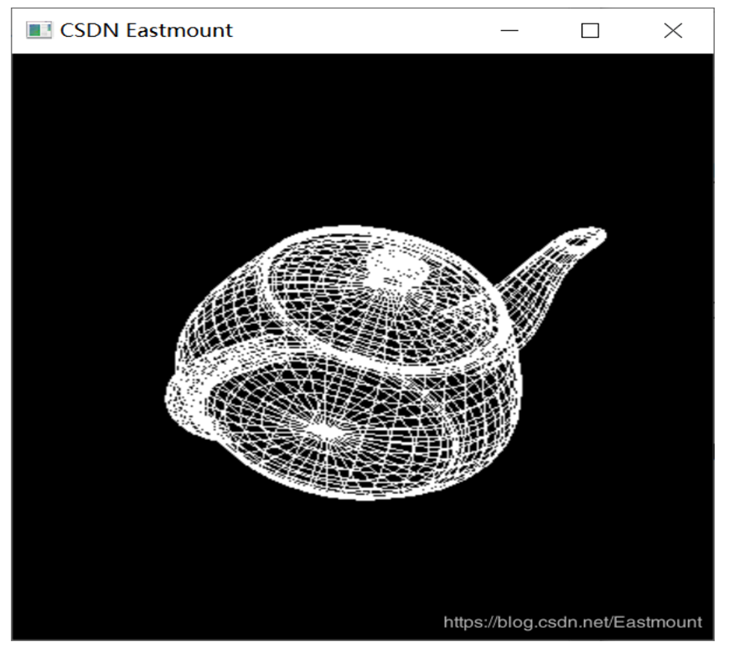

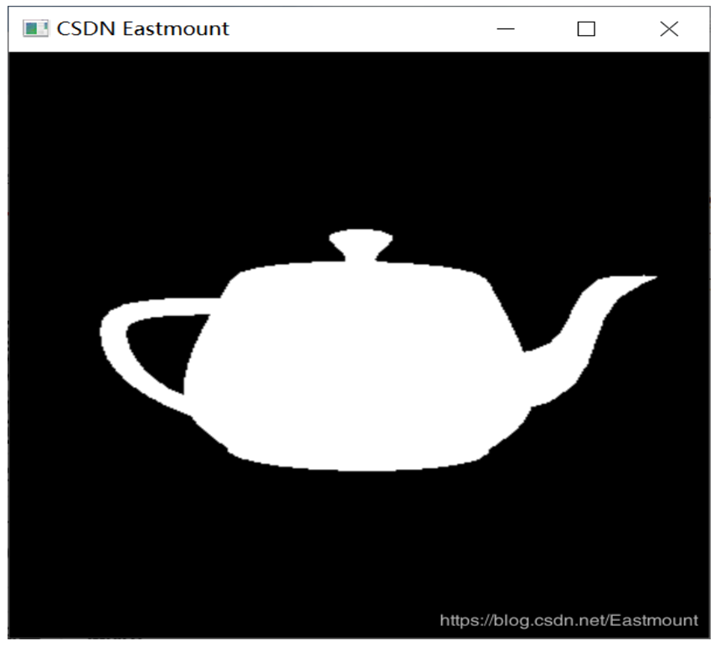

注意
glut提供了一些现成的绘制立体的API，如glutWireSphere绘制球、glutWireCone绘制椎体、glutWireCube绘制立体、glutWireTorus绘制甜圈、glutWireTeapot绘制茶壶、glutWireOctahedron绘制八面体，请同学们自行提升。


3.OpenGL绘制多个图形
接下来绘制一个坐标系，并分别绘制四个图形，设置不同颜色，代码如下所示。


In [ ]:
# -*- coding: utf-8 -*-
from OpenGL.GL import *
from OpenGL.GLU import *
from OpenGL.GLUT import *

# 绘制图像函数
def display():
    # 清除屏幕及深度缓存
    glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)

    # 绘制线段
    glBegin(GL_LINES)
    glVertex2f(-1.0, 0.0)       # 左下角顶点
    glVertex2f(1.0, 0.0)        # 右下角顶点
    glVertex2f(0.0, 1.0)        # 右上角顶点
    glVertex2f(0.0, -1.0)       # 左上角顶点
    glEnd()

    # 绘制顶点
    glPointSize(10.0)
    glBegin(GL_POINTS)
    glColor3f(1.0, 0.0, 0.0)    # 红色
    glVertex2f(0.3, 0.3)
    glColor3f(0.0, 1.0, 0.0)    # 绿色
    glVertex2f(0.5, 0.6)
    glColor3f(0.0, 0.0, 1.0)    # 蓝色
    glVertex2f(0.9, 0.9)
    glEnd()

    # 绘制四边形
    glColor3f(1.0, 1.0, 0)
    glBegin(GL_QUADS)
    glVertex2f(-0.2, 0.2)
    glVertex2f(-0.2, 0.5)
    glVertex2f(-0.5, 0.5)
    glVertex2f(-0.5, 0.2)
    glEnd()

    # 绘制多边形
    glColor3f(0.0, 1.0, 1.0)
    glPolygonMode(GL_FRONT, GL_LINE)
    glPolygonMode(GL_BACK, GL_FILL)
    glBegin(GL_POLYGON)
    glVertex2f(-0.5, -0.1)
    glVertex2f(-0.8, -0.3)
    glVertex2f(-0.8, -0.6)
    glVertex2f(-0.5, -0.8)
    glVertex2f(-0.2, -0.6)
    glVertex2f(-0.2, -0.3)
    glEnd()

    # 绘制三角形
    glColor3f(1.0, 1.0, 1.0)
    glPolygonMode(GL_FRONT, GL_FILL)
    glPolygonMode(GL_BACK, GL_LINE)
    glBegin(GL_TRIANGLES)
    glVertex2f(0.5, -0.5)
    glVertex2f(0.3, -0.3)
    glVertex2f(0.2, -0.6)
    
    # 结束绘制四边形
    glEnd()
    # 清空缓冲区并将指令送往硬件执行
    glFlush()

# 主函数
if __name__ == "__main__":
    # 使用glut库初始化OpenGL
    glutInit()
    # 显示模式 GLUT_SINGLE无缓冲直接显示|GLUT_RGBA采用RGB(A非alpha)
    glutInitDisplayMode(GLUT_SINGLE | GLUT_RGBA)
    # 设置窗口位置及大小
    glutInitWindowSize(400, 400)
    glutInitWindowPosition(500, 300)
    # 创建窗口
    glutCreateWindow("CSDN Eastmount")
    # 调用display()函数绘制图像
    glutDisplayFunc(display)
    # 进入glut主循环
    glutMainLoop()



输出结果如下图所示：


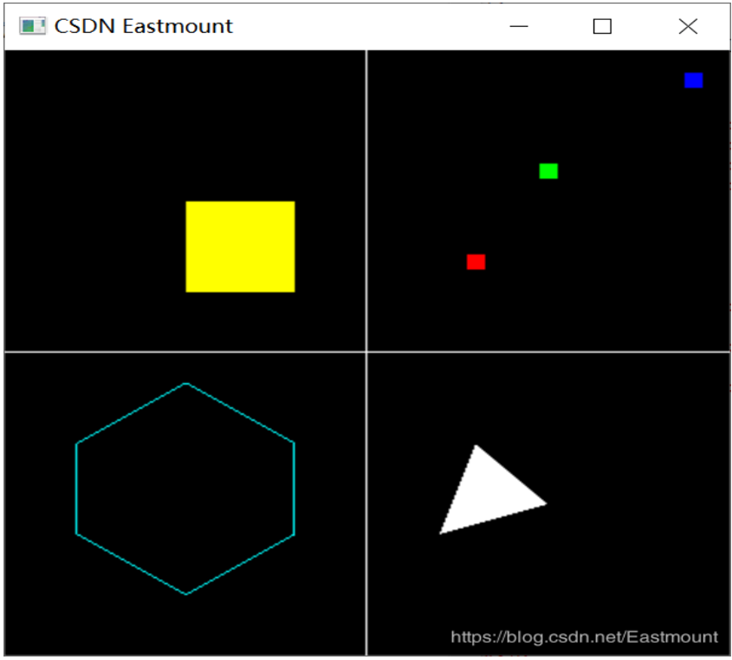

4.OpenGL绘图代码及原理详解

该部分将详细讲解上面三段代码的核心知识，帮助大家巩固基础。作者让大家先看代码及其运行效果，从而提升OpenGL编程兴趣，再深入分析其原理，这种倒叙的方式希望您们喜欢。

(1) 核心函数上述代码中，以glut开头的函数都是GLUT工具包所提供的函数。
glutInit()：对GLUT进行初始化，该函数必须在其它的GLUT使用之前调用一次。其格式比较死板，一般glutInit()直接调用即可。
glutInitDisplayMode()：设置显示方式，其中GLUT_RGB表示使用RGB颜色，与之对应的是GLUT_INDEX（表示使用索引颜色）；GLUT_SINGLE表示使用单缓冲，与之对应的是GLUT_DOUBLE（表示使用双缓冲）。更多参数请读者阅读官方网站或Google。


glutInitWindowPosition()：设置窗口在屏幕中的位置。
glutInitWindowSize()：设置窗口的大小，两个参数表示长度和宽度。
glutCreateWindow()：根据当前设置的信息创建窗口，参数将作为窗口的标题。需要注意的是，当窗口被创建后，并不是立即显示到屏幕上，需要调用glutMainLoop()才能看到窗口。
glutDisplayFunc()：设置一个函数，当需要进行画图时，这个函数就会被调用，通常用来调用绘制图形函数。
glutMainLoop()：进行一个消息循环，大家需要知道这个函数可以显示窗口，并且等待窗口关闭后才会返回。


以gl开头的函数都是OpenGL的标准函数。
glClear()：清除，其中参数GL_COLOR_BUFFER_BIT表示清除颜色，GL_DEPTH_BUFFER_BIT表示清除深度。
glRectf()：画一个矩形，四个参数分别表示位于对角线上的两个点的横、纵坐标。
glFlush()：刷新显示图像，保证前面的OpenGL命令立即执行，而不是让它们在缓冲区中等待。
OpenGL要求指定顶点的命令（glVertex2f）必须包含在glBegin()函数和glEnd()函数之间执行。


(2) 绘制顶点
顶点（vertex）是 OpengGL 中非常重要的概念，描述线段、多边形都离不开顶点。它们都是以glVertex开头，后面跟一个数字和1~2个字母，比如：glVertex2d，glVertex2f，glVertex3f，glVertex3fv
数字表示参数的个数，2表示有2个参数（xy坐标），3表示三个（xyz坐标），4表示四个（齐次坐标 w）。字母表示参数的类型，s表示16位整数（OpenGL中将这个类型定义为GLshort），i表示32位整数（OpenGL中将这个类型定义为GLint和GLsizei），f表示32为浮点数（OpenGL中将这个类型定义为GLfloat和GLclampf），d表示64位浮点数（OpenGL中将这个类型定义为GLdouble和GLclampd）。例如：
glVertex2i(1, 3)，glVertex2f(1.0, 3.0)，glVertex3f(1.0, 3.0, 1.0)，glVertex4f(1.0, 3.0, 0.0, 1.0)
注意，OpenGL中很多函数都采用这种形式命名。


(3) 设置颜色
在OpenGL中，设置颜色函数以glColor开头，后面跟着参数个数和参数类型。参数可以是0到255之间的无符号整数，也可以是0到1之间的浮点数。三个参数分别表示RGB分量，第四个参数表示透明度（其实叫不透明度更恰当）。以下最常用的两个设置颜色的方法：
glColor3f(1.0，0.0，0.0)  #红色
glColor3f(0.0，1.0，0.0)  #绿色
glColor3f(0.0，0.0，1.0)  #蓝色
glColor3f(1.0，1.0，1.0)  #白色
glColor4f(0.0，1.0，0.0，0.0)  #红色且不透明度
glColor3ub(255, 0, 0)    #红色
注意，OpenGL是使用状态机模式，颜色是一个状态变量，设置颜色就是改变这个状态变量并一直生效，直到再次调用设置颜色的函数。除了颜色，OpenGL 还有很多的状态变量或模式。


(4) 绘制基本图形
前面我们介绍了各种图像，下表展示了常见的图像元件。
GL_POINTS：绘制顶点
GL_LINES：绘制线段
GL_LINE_STRIP：绘制连续线段
GL_LINE_LOOP：绘制闭合的线段
GL_POLYGON：绘制多边形
GL_TRIANGLES：绘制三角形
GL_TRIANGLE_STRIP：绘制连续三角形
GL_TRIANGLE_FAN：绘制多个三角形组成的扇形
GL_QUADS：绘制四边形
GL_QUAD_STRIP：绘制连续四边形


详见下图所示。


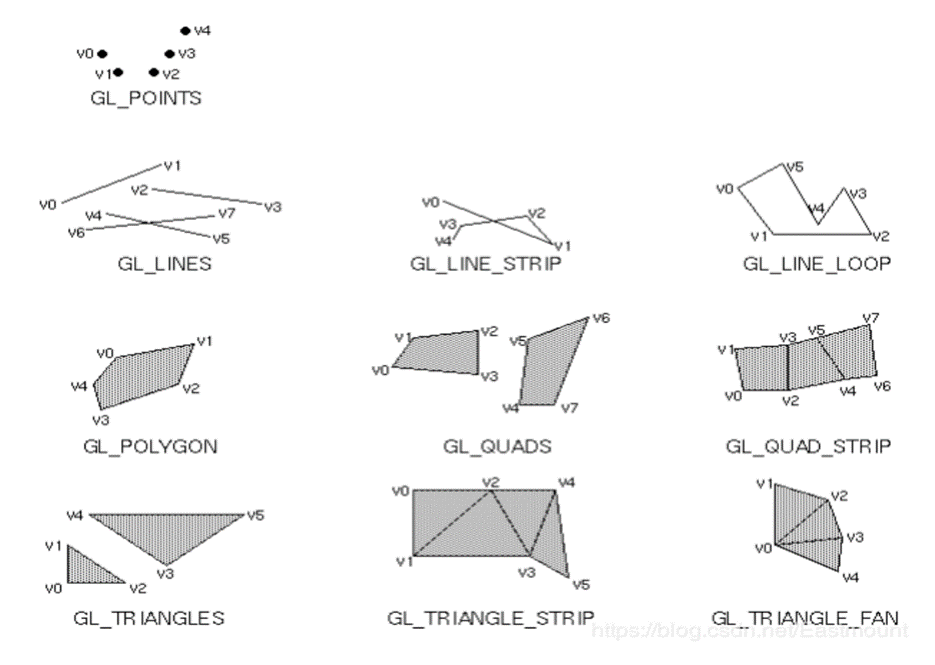

## 27.3.OpenGL基础知识

1.OpenGL语法
OpenGL程序的基本结构通常包括——初始化物体渲染所对应的状态、设置需要渲染的物体。渲染（render）表示计算机从模型创建最终图像的过程，OpenGL只是其中一种渲染系统。模型（model）或者场景对象是通过几何图元，比如点、线和三角形来构建的，而图元与模型的顶点（vertex）也存在着各种对应的关系。
OpenGL另一个最本质的概念叫着色器，它是图形硬件设备所执行的一类特色函数。可以将着色器理解为专为图形处理单元（GPU）编译的一种小型程序。在OpenGL中，会用到始终不同的着色阶段（shader stage），最常用的包括顶点着色器（vertex shader）以及片元着色器，前者用于处理顶点数据，后者用于处理光栅化后的片元数据。所有的OpenGL程序都需要用到这两类着色器。最终生成的图像包含了屏幕上绘制的所有像素点。像素（pixel）是显示器上最小的可见单元。计算机系统将所有的像素保存到帧缓存（framebuffer）当中，后者是由图形硬件设备管理的一块独立内存区域，可以直接映射到最终的显示设备上。


正如前面您看到的，OpenGL库中所有的函
数都会以字符“gl”作为前缀，然后是一个
或者多个大写字母开头的词组，以此来命
令一个完整的函数（例如glBindVertexArray()）
。OpenGL的所有函数都是这种格式，上面
看到的“glut”开头的函数，它们来自第三
方库OpenGL Utility Toolkit（GLUT），可以
用来显示窗口、管理用户输入以及执行其
他一些操作。


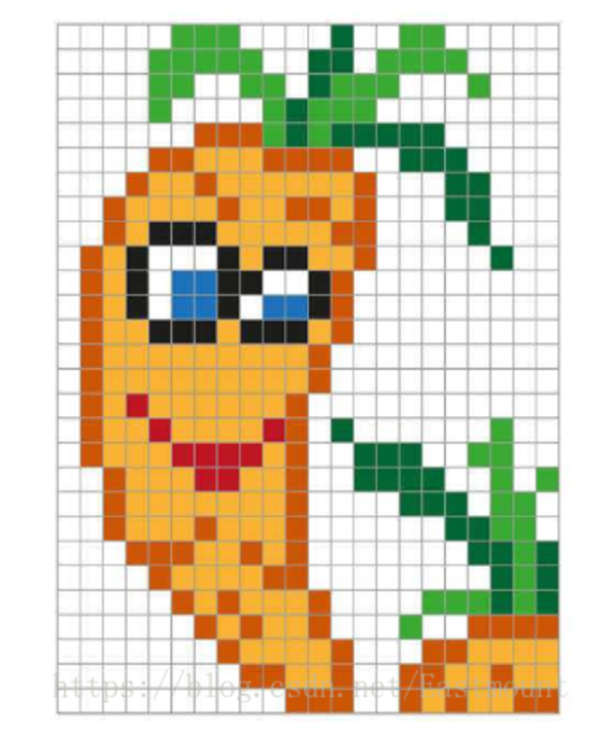

与函数命名约定类似，OpenGL库中定义的常量也是GL_COLOR_BUFFER_BIT的形式，常量以GL_作为前缀，并且使用下划线来分割单词。这些常量的定义是通过#define来完成的，它们基本可以在OpenGL的头文件glcorearb.h和glext.h中找到。为了能够方便地在不同的操作系统之间移植OpenGL程序，它还为函数定义了不同的数据类型，例如GLfloat是浮点数类型。此外，比如glVertex*()的函数，它有多种变化形式，如glVertex2d、glVertex2f。在函数名称的“核心”部分之后，通过后缀的变化来提示函数应当传入的参数，通常由一个数字和1~2个字母组成。glVertex2f()中的“2”表示需要传入2个参数，f表示浮点数。


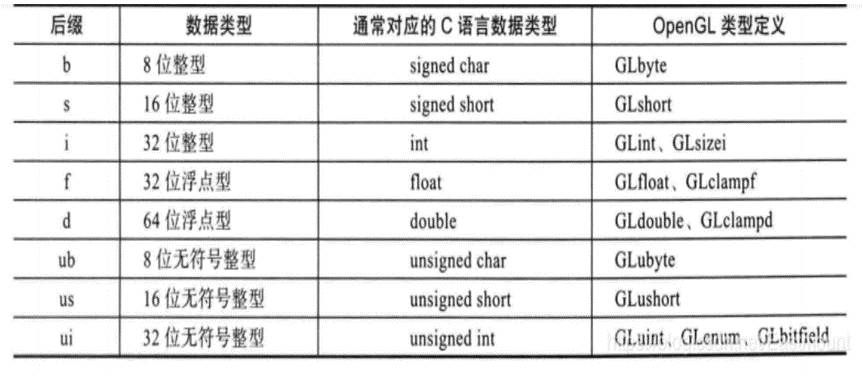

2.老式OpenGL vs 现代OpenGL
(1) 老式OpenGL在大多数计算机图形系统中，绘图的方式是将一些顶点发送给处理管线，管线由一系列功能模块互相连接而成。最近，OpenGL应用编程接口（API）从固定功能的图形管线转换为可编程的图形管线。如下图绘制正方形的代码，它使用的是老式OpenGL，要为三维图元（在这个代码中，是一个GL_QUADS即矩形）指定各个顶点，但随后每个顶点需要被分别发送到GPU，这是低效的方式。 这种老式编程模式伸缩性不好，如果几何图形变得复杂，程序就会很慢。对于屏幕上的顶点和像素如何变换，它只提供了有限的控制。后续我们将专注于现代的OpenGL，但是网络上也会有老式OpenGL的例子。


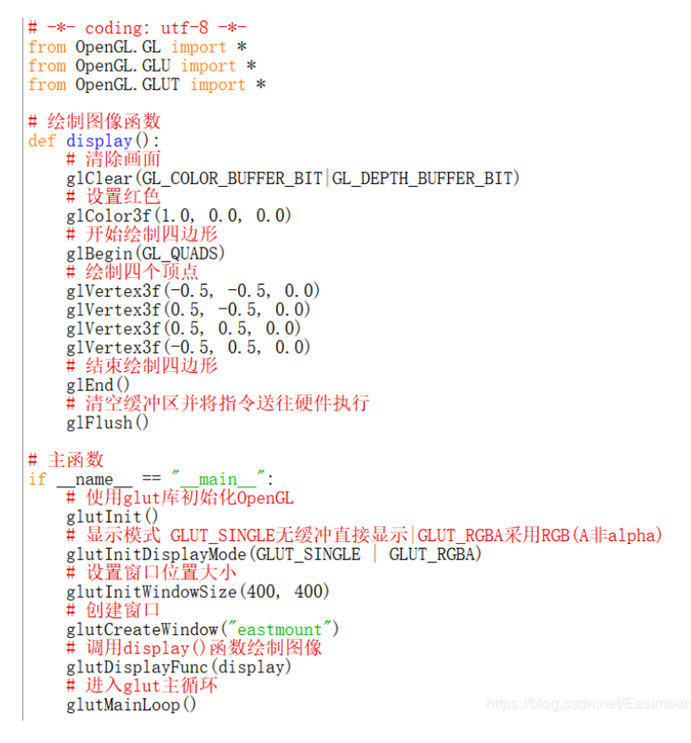

(2) 现代OpenGL现代OpenGL利用一系列的操作，即通过“三维图形管线”绘制图形，其基本流程如下图所示。


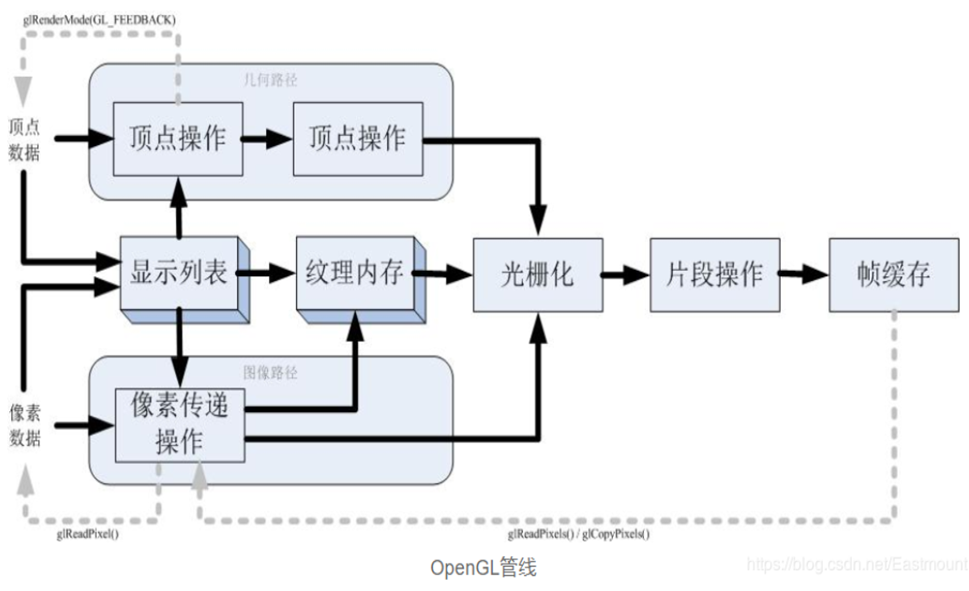

简化三维图形管线分为6步：
三维几何图形定义（VBO等）。 在第一步，通过定义在三维空间中的三角形的顶点，并指定每个顶点相关联的颜色，我们定义了三维几何图形。
顶点着色器。 接下来，变换这些顶点：第一次变换将这些顶点放在三维空间中，第二次变换将三维坐标投影到二维空间。根据照明等因素，对应顶点的颜色值也在这一步中计算，这在代码中通常称为“顶点着色器”。
光栅化。 将几何图形“光栅化”（从几何物体转换为像素）。
片段着色器。 针对每个像素，执行另一个名为“片段着色器”的代码块。正如顶点着色器作用于三维顶点，片段着色器作用于光栅化后的二维像素。
帧缓冲区操作（深度测试、混合等）。 最后，像素经过一系列帧缓冲区操作，其中，它经过“深度缓冲区检验”（检查一个片段是否遮挡另一个）、“混合”（用透明度混合两个片段）以及其他操作，其当前的颜色与帧缓冲区中该位置已有的颜色结合。
帧缓冲区。 这些变化最终体现在最后的帧缓冲区上，通常显示在屏幕上。


In [ ]:
#-*- coding: utf-8 -*-
from OpenGL.GL import *
from OpenGL.GLU import *
from OpenGL.GLUT import *
import math
import time

h = 0
m = 0
s = 0

#绘制图像函数
def Draw():
    PI = 3.1415926
    R = 0.5
    TR = R - 0.05
    glClear(GL_COLOR_BUFFER_BIT)
    glLineWidth(5)
    glBegin(GL_LINE_LOOP)
    for i in range(100):
        glVertex2f(R * math.cos(2 * PI / 100 * i), R * math.sin(2 * PI / 100 * i))
    glEnd()
    glLineWidth(2)
    for i in range(100):
        glBegin(GL_LINES)
        glVertex2f(TR * math.sin(2 * PI / 12 * i), TR * math.cos(2 * PI / 12 * i))
        glVertex2f(R * math.sin(2 * PI / 12 * i), R * math.cos(2 * PI / 12 * i))
        glEnd()
    glLineWidth(1)

    h_Length = 0.2
    m_Length = 0.3
    s_Length = 0.4
    count = 60.0
    s_Angle = s / count
    count *= 60
    m_Angle = (m * 60 + s) / count
    count *= 12
    h_Angle = (h * 60 * 60 + m * 60 + s) / count
    glLineWidth(1)
    glBegin(GL_LINES)
    glVertex2f(0.0, 0.0)
    glVertex2f(s_Length * math.sin(2 * PI * s_Angle), s_Length * math.cos(2 * PI * s_Angle))
    glEnd()
    glLineWidth(5)
    glBegin(GL_LINES)
    glVertex2f(0.0, 0.0)
    glVertex2f(h_Length * math.sin(2 * PI * h_Angle), h_Length * math.cos(2 * PI * h_Angle))
    glEnd()
    glLineWidth(3)
    glBegin(GL_LINES)
    glVertex2f(0.0, 0.0)
    glVertex2f(m_Length * math.sin(2 * PI * m_Angle), m_Length * math.cos(2 * PI * m_Angle))
    glEnd()
    glLineWidth(1)
    glBegin(GL_POLYGON)
    for i in range(100):
        glVertex2f(0.03 * math.cos(2 * PI / 100 * i), 0.03 * math.sin(2 * PI / 100 * i));
    glEnd()
    glFlush()

#更新时间函数
def Update():
    global h, m, s
    t = time.localtime(time.time())
    h = int(time.strftime('%H', t))
    m = int(time.strftime('%M', t))
    s = int(time.strftime('%S', t))
    glutPostRedisplay()

#主函数
if __name__ == "__main__":
    glutInit()
    glutInitDisplayMode(GLUT_SINGLE | GLUT_RGBA)
    glutInitWindowSize(400, 400)
    glutCreateWindow("My clock")
    glutDisplayFunc(Draw)
    glutIdleFunc(Update)
    glutMainLoop() 


其运行结果如下图所示：


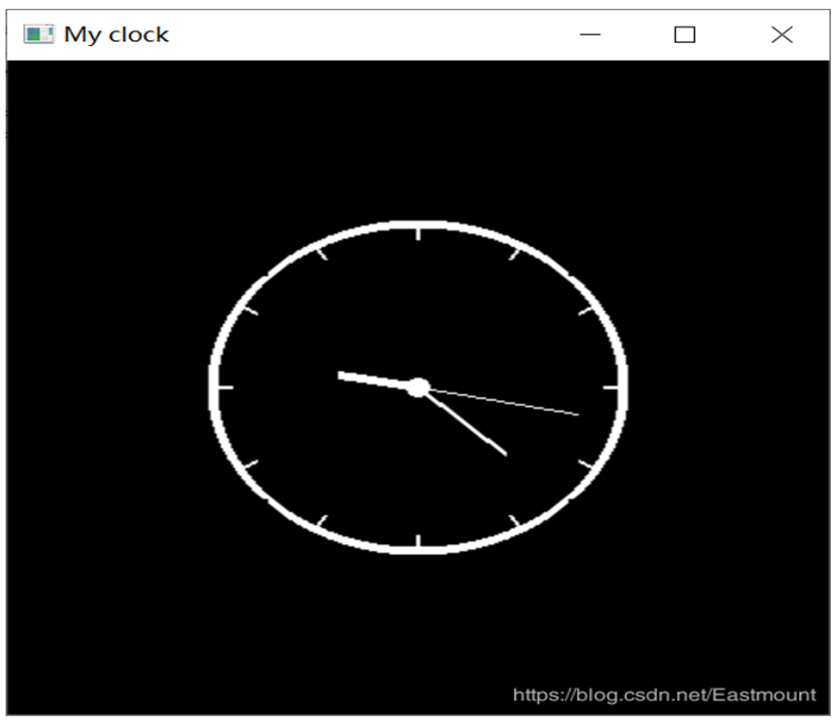